# 01. Load a sample data 

Let's first load the [public holidays](https://azure.microsoft.com/en-us/services/open-datasets/catalog/public-holidays/) of last 6 months from Azure Open datasets as a sample.

In [1]:
from azureml.opendatasets import PublicHolidays

from datetime import datetime
from dateutil import parser
from dateutil.relativedelta import relativedelta


end_date = datetime.today()
start_date = datetime.today() - relativedelta(months=6)
hol = PublicHolidays(start_date=start_date, end_date=end_date)
hol_df = hol.to_spark_dataframe()

StatementMeta(sparkpool1, 1, 1, Finished, Available)

In [2]:
# Display 5 rows
hol_df.show(5, truncate = False)

StatementMeta(sparkpool1, 1, 2, Finished, Available)

+---------------+-----------------------+-----------------------+-------------+-----------------+-------------------+
|countryOrRegion|holidayName            |normalizeHolidayName   |isPaidTimeOff|countryRegionCode|date               |
+---------------+-----------------------+-----------------------+-------------+-----------------+-------------------+
|Norway         |Søndag                 |Søndag                 |null         |NO               |2021-04-18 00:00:00|
|Sweden         |Söndag                 |Söndag                 |null         |SE               |2021-04-18 00:00:00|
|Brazil         |Tiradentes             |Tiradentes             |null         |BR               |2021-04-21 00:00:00|
|Australia      |Anzac Day              |Anzac Day              |null         |AU               |2021-04-25 00:00:00|
|Italy          |Festa della Liberazione|Festa della Liberazione|null         |IT               |2021-04-25 00:00:00|
+---------------+-----------------------+---------------

# 02. Write data to the default ADLS Gen2 storage

We are going to write the spark dateframe to your default ADLS Gen2 storage account.


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Primary storage info
account_name = 'adlsgen2adlsgen2' # fill in your primary account name
container_name = 'sparkdemo' # fill in your container name
relative_path = 'sparkdemo01/' # fill in your relative folder path

adls_path = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path)
print('Primary storage account path: ' + adls_path)

StatementMeta(sparkpool1, 1, 3, Finished, Available)

Primary storage account path: abfss://sparkdemo@adlsgen2adlsgen2.dfs.core.windows.net/sparkdemo01/

## 02-1. Save a dataframe as Parquet, JSON, or CSV
If you have a dataframe, you can save it to Parquet or JSON with the .write.parquet(), .write.json() and .write.csv() methods respectively.

Dataframes can be saved in any format, regardless of the input format.


In [4]:
parquet_path = adls_path + 'holiday.parquet'
json_path = adls_path + 'holiday.json'
csv_path = adls_path + 'holiday.csv'
print('parquet file path: ' + parquet_path)
print('json file path： ' + json_path)
print('csv file path: ' + csv_path)

StatementMeta(sparkpool1, 1, 4, Finished, Available)

parquet file path: abfss://sparkdemo@adlsgen2adlsgen2.dfs.core.windows.net/sparkdemo01/holiday.parquet
json file path： abfss://sparkdemo@adlsgen2adlsgen2.dfs.core.windows.net/sparkdemo01/holiday.json
csv file path: abfss://sparkdemo@adlsgen2adlsgen2.dfs.core.windows.net/sparkdemo01/holiday.csv

In [5]:
hol_df.write.parquet(parquet_path, mode = 'overwrite')
hol_df.write.json(json_path, mode = 'overwrite')
hol_df.write.csv(csv_path, mode = 'overwrite', header = 'true')

StatementMeta(sparkpool1, 1, 5, Finished, Available)

## 02-2. Read data from the default ADLS Gen2 storage

In [6]:
df_parquet = spark.read.parquet(parquet_path)
df_parquet.show()

StatementMeta(sparkpool1, 1, 6, Finished, Available)

+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|         holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|               date|
+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|         Norway|              Søndag|              Søndag|         null|               NO|2021-04-18 00:00:00|
|         Sweden|              Söndag|              Söndag|         null|               SE|2021-04-18 00:00:00|
|         Brazil|          Tiradentes|          Tiradentes|         null|               BR|2021-04-21 00:00:00|
|      Australia|           Anzac Day|           Anzac Day|         null|               AU|2021-04-25 00:00:00|
|          Italy|Festa della Liber...|Festa della Liber...|         null|               IT|2021-04-25 00:00:00|
|    New Zealand|           Anzac Day|           Anzac Day|         null|               NZ|2021-04-25 00

In [7]:
df_json = spark.read.json(json_path)
df_json.show()

StatementMeta(sparkpool1, 1, 7, Finished, Available)

+---------------+-----------------+--------------------+--------------------+-------------+--------------------+
|countryOrRegion|countryRegionCode|                date|         holidayName|isPaidTimeOff|normalizeHolidayName|
+---------------+-----------------+--------------------+--------------------+-------------+--------------------+
|         Norway|               NO|2021-04-18T00:00:...|              Søndag|         null|              Søndag|
|         Sweden|               SE|2021-04-18T00:00:...|              Söndag|         null|              Söndag|
|         Brazil|               BR|2021-04-21T00:00:...|          Tiradentes|         null|          Tiradentes|
|      Australia|               AU|2021-04-25T00:00:...|           Anzac Day|         null|           Anzac Day|
|          Italy|               IT|2021-04-25T00:00:...|Festa della Liber...|         null|Festa della Liber...|
|    New Zealand|               NZ|2021-04-25T00:00:...|           Anzac Day|         null|     

In [8]:
df_csv = spark.read.csv(csv_path, header = 'true')
df_csv.show()

StatementMeta(sparkpool1, 1, 8, Finished, Available)

+---------------+--------------------+--------------------+-------------+-----------------+--------------------+
|countryOrRegion|         holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|                date|
+---------------+--------------------+--------------------+-------------+-----------------+--------------------+
|         Norway|              Søndag|              Søndag|         null|               NO|2021-04-18T00:00:...|
|         Sweden|              Söndag|              Söndag|         null|               SE|2021-04-18T00:00:...|
|         Brazil|          Tiradentes|          Tiradentes|         null|               BR|2021-04-21T00:00:...|
|      Australia|           Anzac Day|           Anzac Day|         null|               AU|2021-04-25T00:00:...|
|          Italy|Festa della Liber...|Festa della Liber...|         null|               IT|2021-04-25T00:00:...|
|    New Zealand|           Anzac Day|           Anzac Day|         null|               NZ|2021-

# 03. Write data to the Delta Lake table

In [9]:
# Delta Lake relative path
delta_relative_path = adls_path + 'delta/holiday/'
print('Delta Lake path: ' + delta_relative_path)

StatementMeta(sparkpool1, 1, 9, Finished, Available)

Delta Lake path: abfss://sparkdemo@adlsgen2adlsgen2.dfs.core.windows.net/sparkdemo01/delta/holiday/

In [10]:
# Filter out indian holidays
hol_df_IN = hol_df[(hol_df.countryRegionCode == "IN")]
hol_df_IN.show(5, truncate = False)

StatementMeta(sparkpool1, 1, 10, Finished, Available)

+---------------+----------------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|holidayName     |normalizeHolidayName|isPaidTimeOff|countryRegionCode|date               |
+---------------+----------------+--------------------+-------------+-----------------+-------------------+
|India          |Labour Day      |Labour Day          |false        |IN               |2021-05-01 00:00:00|
|India          |Independence Day|Independence Day    |true         |IN               |2021-08-15 00:00:00|
|India          |Gandhi Jayanti  |Gandhi Jayanti      |true         |IN               |2021-10-02 00:00:00|
+---------------+----------------+--------------------+-------------+-----------------+-------------------+

In [11]:
#Let's write the data in the Delta Lake table. 
hol_df_IN.write.mode("overwrite").format("delta").partitionBy("holidayName").save(delta_relative_path)

StatementMeta(sparkpool1, 1, 11, Finished, Available)

In [12]:
delta_data = spark.read.format("delta").load(delta_relative_path)
delta_data.show()

StatementMeta(sparkpool1, 1, 12, Finished, Available)

+---------------+----------------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|     holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|               date|
+---------------+----------------+--------------------+-------------+-----------------+-------------------+
|          India|Independence Day|    Independence Day|         true|               IN|2021-08-15 00:00:00|
|          India|  Gandhi Jayanti|      Gandhi Jayanti|         true|               IN|2021-10-02 00:00:00|
|          India|      Labour Day|          Labour Day|        false|               IN|2021-05-01 00:00:00|
+---------------+----------------+--------------------+-------------+-----------------+-------------------+

### Overwrite the entire Delta Lake table


In [13]:
#Let's overwrite the entire delta file with 1 record

hol_df_JP= hol_df[(hol_df.countryRegionCode == "JP")]
hol_df_JP.write.format("delta").mode("overwrite").save(delta_relative_path)

StatementMeta(sparkpool1, 1, 13, Finished, Available)

In [14]:
delta_data = spark.read.format("delta").load(delta_relative_path)
delta_data.show()

StatementMeta(sparkpool1, 1, 14, Finished, Available)

+---------------+-----------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|               date|
+---------------+-----------+--------------------+-------------+-----------------+-------------------+
|          Japan| みどりの日|          みどりの日|         null|               JP|2021-05-04 00:00:00|
|          Japan| 憲法記念日|          憲法記念日|         null|               JP|2021-05-03 00:00:00|
|          Japan| こどもの日|          こどもの日|         null|               JP|2021-05-05 00:00:00|
|          Japan|   体育の日|            体育の日|         null|               JP|2021-10-11 00:00:00|
|          Japan|   昭和の日|            昭和の日|         null|               JP|2021-04-29 00:00:00|
|          Japan|   秋分の日|            秋分の日|         null|               JP|2021-09-23 00:00:00|
|          Japan|   敬老の日|            敬老の日|         null|               JP|2021-09-20 00:00:00|
|          Japan|     海の日|      

### Merge new data based on given merge condition 

In [15]:
# Upsert (merge) the United States' holiday data with Japan's
 
from delta.tables import *

deltaTable = DeltaTable.forPath(spark,delta_relative_path)

hol_df_US= hol_df[(hol_df.countryRegionCode == "US")]


deltaTable.alias("hol_df_JP").merge(
     source = hol_df_US.alias("hol_df_US"),
     condition = "hol_df_JP.countryRegionCode = hol_df_US.countryRegionCode"
    ).whenMatchedUpdate(set = 
    {}).whenNotMatchedInsert( values = 
    {
        "countryOrRegion" : "hol_df_US.countryOrRegion",
        "holidayName" : "hol_df_US.holidayName",
        "normalizeHolidayName" : "hol_df_US.normalizeHolidayName",
        "isPaidTimeOff":"hol_df_US.isPaidTimeOff",
        "countryRegionCode":"hol_df_US.countryRegionCode",
        "date":"hol_df_US.date"
    }
    ).execute()


deltaTable.toDF().show()

StatementMeta(sparkpool1, 1, 15, Finished, Available)

+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|         holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|               date|
+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|  United States|    Independence Day|    Independence Day|         true|               US|2021-07-04 00:00:00|
|  United States|Independence Day ...|    Independence Day|         true|               US|2021-07-05 00:00:00|
|  United States|        Memorial Day|        Memorial Day|         true|               US|2021-05-31 00:00:00|
|  United States|        Columbus Day|        Columbus Day|        false|               US|2021-10-11 00:00:00|
|  United States|           Labor Day|           Labor Day|         true|               US|2021-09-06 00:00:00|
|          Japan|          みどりの日|          みどりの日|         null|               JP|2021-05-04 00:00:00|
| 

### Update table on the rows that match the given condition

In [16]:
# Update column the 'null' value in 'isPaidTimeOff' with 'false'

from pyspark.sql.functions import *
deltaTable.update(
    condition = (col("isPaidTimeOff").isNull()),
    set = {"isPaidTimeOff": "false"})

deltaTable.toDF().show()

StatementMeta(sparkpool1, 1, 16, Finished, Available)

+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|countryOrRegion|         holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|               date|
+---------------+--------------------+--------------------+-------------+-----------------+-------------------+
|  United States|    Independence Day|    Independence Day|         true|               US|2021-07-04 00:00:00|
|  United States|Independence Day ...|    Independence Day|         true|               US|2021-07-05 00:00:00|
|  United States|        Memorial Day|        Memorial Day|         true|               US|2021-05-31 00:00:00|
|  United States|        Columbus Day|        Columbus Day|        false|               US|2021-10-11 00:00:00|
|  United States|           Labor Day|           Labor Day|         true|               US|2021-09-06 00:00:00|
|          Japan|          みどりの日|          みどりの日|        false|               JP|2021-05-04 00:00:00|
| 

### Delete data from the table that match the given condition

In [17]:
print("Row count before delete: ")
print(deltaTable.toDF().count())


# Delte data with date later than 2020-01-01
deltaTable.delete ("date > '2020-01-01'")


print("Row count after delete:  ")
print(deltaTable.toDF().count())
deltaTable.toDF().show()

StatementMeta(sparkpool1, 1, 17, Finished, Available)

Row count before delete: 
14
Row count after delete:  
0
+---------------+-----------+--------------------+-------------+-----------------+----+
|countryOrRegion|holidayName|normalizeHolidayName|isPaidTimeOff|countryRegionCode|date|
+---------------+-----------+--------------------+-------------+-----------------+----+
+---------------+-----------+--------------------+-------------+-----------------+----+

## Get the operation history of the delta table

In [18]:
fullHistoryDF = deltaTable.history()
lastOperationDF = deltaTable.history(1)

print('Full history DF: ')
fullHistoryDF.show(truncate = False)

print('lastOperationDF: ')
lastOperationDF.show(truncate = False)

StatementMeta(sparkpool1, 1, 18, Finished, Available)

Full history DF: 
+-------+-----------------------+------+--------+---------+------------------------------------------------------------------------------+----+--------+---------+-----------+--------------+-------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|version|timestamp              |userId|userName|operation|operationParameters                                                           |job |notebook|clusterId|readVersion|isolationLevel|isBlindAppend|operationMetrics                                                                                                                                                                                          |
+-------+-----------------------+------+--------+---------+------------------------------------------------------------------------------+----+--------+---------+------

## Load a sample data

Let's first load the [Public Holidays](https://azure.microsoft.com/en-us/services/open-datasets/catalog/public-holidays/) of last 6 months from Azure Open datasets as a sample.


In [19]:
%%pyspark 
# Load sample data from azure open dataset in pyspark
from azureml.opendatasets import PublicHolidays

from datetime import datetime
from dateutil import parser
from dateutil.relativedelta import relativedelta


end_date = datetime.today()
start_date = datetime.today() - relativedelta(months=6)
hol = PublicHolidays(start_date=start_date, end_date=end_date)
hol_df = hol.to_spark_dataframe()

print('Register the DataFrame as a SQL temporary view: source')
hol_df.createOrReplaceTempView('source')

StatementMeta(sparkpool1, 1, 19, Finished, Available)

Register the DataFrame as a SQL temporary view: source

In [20]:
%%spark
// Remove datetime from the data source
val holiday_nodate = spark.sql("SELECT countryOrRegion, holidayName, normalizeHolidayName,isPaidTimeOff,countryRegionCode FROM source")
holiday_nodate.show(5,truncate = false)

StatementMeta(sparkpool1, 1, 21, Finished, Available)

holiday_nodate: org.apache.spark.sql.DataFrame = [countryOrRegion: string, holidayName: string ... 3 more fields]
+---------------+-----------------------+-----------------------+-------------+-----------------+
|countryOrRegion|holidayName            |normalizeHolidayName   |isPaidTimeOff|countryRegionCode|
+---------------+-----------------------+-----------------------+-------------+-----------------+
|Norway         |Søndag                 |Søndag                 |null         |NO               |
|Sweden         |Söndag                 |Söndag                 |null         |SE               |
|Brazil         |Tiradentes             |Tiradentes             |null         |BR               |
|Australia      |Anzac Day              |Anzac Day              |null         |AU               |
|Italy          |Festa della Liberazione|Festa della Liberazione|null         |IT               |
+---------------+-----------------------+-----------------------+-------------+-----------------+
only

## Write a Spark dataframe into your sql pool


In [21]:
%%spark
// Write the dataframe into your sql pool
import org.apache.spark.sql.SqlAnalyticsConnector._
import com.microsoft.spark.sqlanalytics.utils.Constants

val sql_pool_name = "sqlpool" //fill in your sql pool name

holiday_nodate.write.sqlanalytics(s"$sql_pool_name.dbo.PublicHoliday", Constants.INTERNAL)


StatementMeta(sparkpool1, 1, 22, Finished, Available)

import org.apache.spark.sql.SqlAnalyticsConnector._
import com.microsoft.spark.sqlanalytics.utils.Constants
sql_pool_name: String = sqlpool


## Read from a SQL Pool table with Spark



In [22]:
%%spark
// Read  the table we just created in the sql pool as a Spark dataframe
val spark_read = spark.read.
    sqlanalytics(s"$sql_pool_name.dbo.PublicHoliday")
spark_read.show(5, truncate = false)

StatementMeta(sparkpool1, 1, 23, Finished, Available)

spark_read: org.apache.spark.sql.DataFrame = [countryOrRegion: string, holidayName: string ... 3 more fields]
+---------------+-----------------------+-----------------------+-------------+-----------------+
|countryOrRegion|holidayName            |normalizeHolidayName   |isPaidTimeOff|countryRegionCode|
+---------------+-----------------------+-----------------------+-------------+-----------------+
|Norway         |Søndag                 |Søndag                 |null         |NO               |
|Sweden         |Söndag                 |Söndag                 |null         |SE               |
|Brazil         |Tiradentes             |Tiradentes             |null         |BR               |
|Australia      |Anzac Day              |Anzac Day              |null         |AU               |
|Italy          |Festa della Liberazione|Festa della Liberazione|null         |IT               |
+---------------+-----------------------+-----------------------+-------------+-----------------+
only sho

# Charting in Synapse Notebook

Synapse has common used data visualization packages pre installed, such as **matplotlib**, **bokeh**, **seaborn**, **altair**, **plotly**. This notebook provides examples to do data visualization using charts in Synapse notebook. 


## Matplotlib


StatementMeta(sparkpool1, 1, 24, Finished, Available)

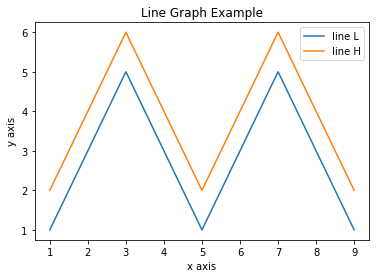

In [23]:
# Line charts

import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

StatementMeta(sparkpool1, 1, 25, Finished, Available)

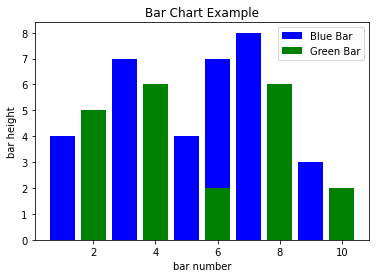

In [24]:
# Bar chart

import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

StatementMeta(sparkpool1, 1, 26, Finished, Available)

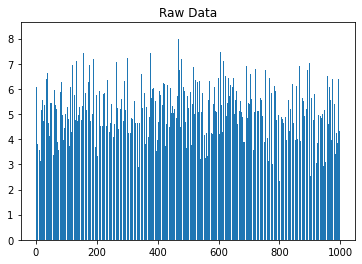

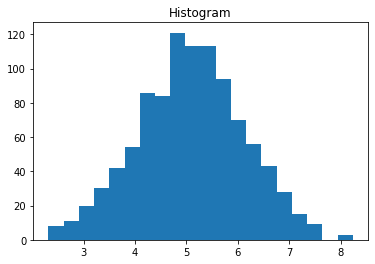

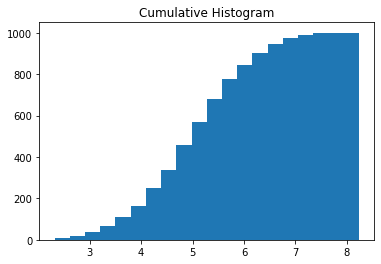

In [25]:
# Histogram

import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

StatementMeta(sparkpool1, 1, 27, Finished, Available)

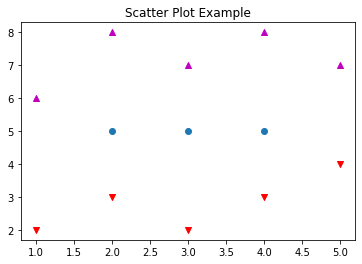

In [26]:
# Scatter chart

import matplotlib.pyplot as plt

x1 = [2, 3, 4]
y1 = [5, 5, 5]

x2 = [1, 2, 3, 4, 5]
y2 = [2, 3, 2, 3, 4]
y3 = [6, 8, 7, 8, 7]

# Markers: https://matplotlib.org/api/markers_api.html

plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='v', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Scatter Plot Example')
plt.show()


StatementMeta(sparkpool1, 1, 28, Finished, Available)

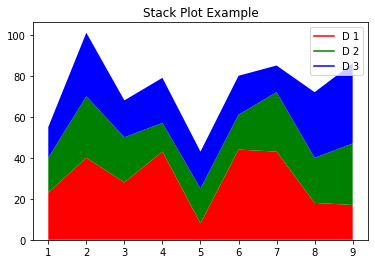

In [27]:
# Stack plots

import matplotlib.pyplot as plt

idxes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9]
arr1  = [23, 40, 28, 43,  8, 44, 43, 18, 17]
arr2  = [17, 30, 22, 14, 17, 17, 29, 22, 30]
arr3  = [15, 31, 18, 22, 18, 19, 13, 32, 39]

# Adding legend for stack plots is tricky.
plt.plot([], [], color='r', label = 'D 1')
plt.plot([], [], color='g', label = 'D 2')
plt.plot([], [], color='b', label = 'D 3')

plt.stackplot(idxes, arr1, arr2, arr3, colors= ['r', 'g', 'b'])
plt.title('Stack Plot Example')
plt.legend()
plt.show()

StatementMeta(sparkpool1, 1, 29, Finished, Available)

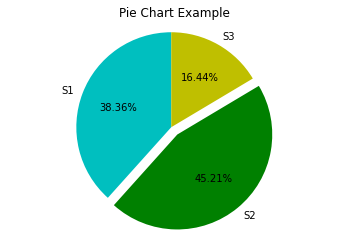

In [28]:
# Pie charts

import matplotlib.pyplot as plt

labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

StatementMeta(sparkpool1, 1, 30, Finished, Available)

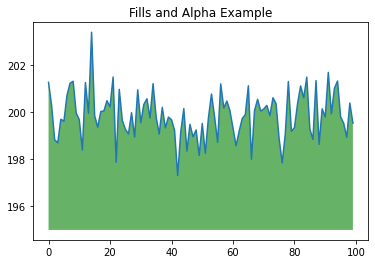

In [29]:
# fill_between and alpha

import matplotlib.pyplot as plt
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

StatementMeta(sparkpool1, 1, 31, Finished, Available)

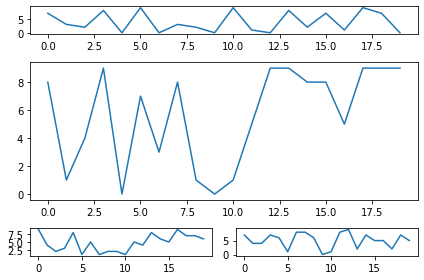

In [30]:
# Subplotting using Subplot2grid

import matplotlib.pyplot as plt
import numpy as np

def random_plots():
  xs = []
  ys = []
  
  for i in range(20):
    x = i
    y = np.random.randint(10)
    
    xs.append(x)
    ys.append(y)
  
  return xs, ys

fig = plt.figure()
ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=2)
ax2 = plt.subplot2grid((5, 2), (1, 0), rowspan=3, colspan=2)
ax3 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

x, y = random_plots()
ax1.plot(x, y)

x, y = random_plots()
ax2.plot(x, y)

x, y = random_plots()
ax3.plot(x, y)

x, y = random_plots()
ax4.plot(x, y)

plt.tight_layout()
plt.show()

StatementMeta(sparkpool1, 1, 32, Finished, Available)

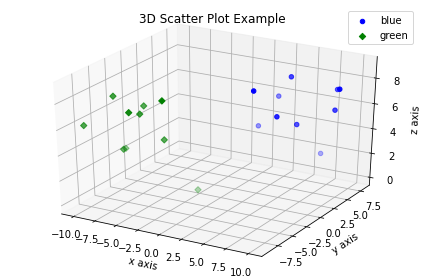

In [31]:
# 3D Scatter Plots

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = np.random.randint(10, size=10)
z1 = np.random.randint(10, size=10)

x2 = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
y2 = np.random.randint(-10, 0, size=10)
z2 = np.random.randint(10, size=10)

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
ax.scatter(x2, y2, z2, c='g', marker='D', label='green')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

StatementMeta(sparkpool1, 1, 33, Finished, Available)

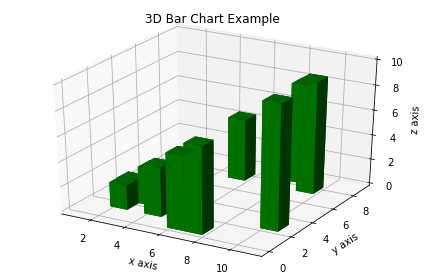

In [32]:
# 3D Bar Plots

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.random.randint(10, size=10)
z = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.bar3d(x, y, z, dx, dy, dz, color='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Bar Chart Example")
plt.tight_layout()
plt.show()

StatementMeta(sparkpool1, 1, 34, Finished, Available)

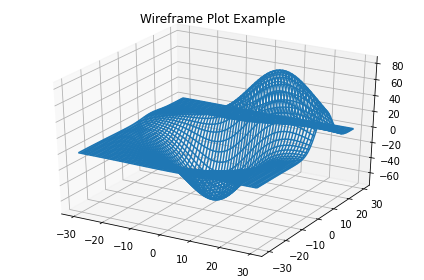

In [33]:
# Wireframe Plots

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x, y, z = axes3d.get_test_data()

ax.plot_wireframe(x, y, z, rstride = 2, cstride = 2)

plt.title("Wireframe Plot Example")
plt.tight_layout()
plt.show()

## Seaborn
Seaborn is a library layered on top of Matplotlib that you can use.

StatementMeta(sparkpool1, 1, 35, Finished, Available)

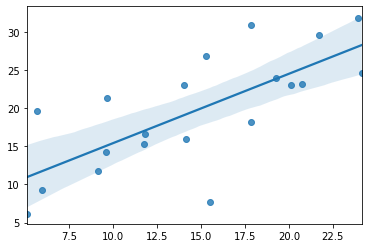

/home/trusted-service-user/cluster-env/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

In [34]:
# Scatterplot with a nice regression line fit to it, all with just one call to Seaborn's regplot.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20
# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)
# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)
sns.regplot(x, y)
plt.show()

StatementMeta(sparkpool1, 1, 36, Finished, Available)

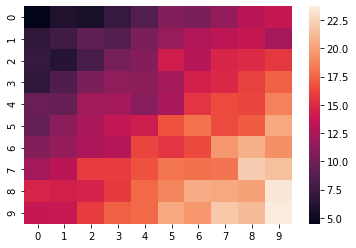

In [35]:
# Seanborn heatmap

import matplotlib.pyplot as plt
import numpy as np

# Make a 10 x 10 heatmap of some random data
side_length = 10
# Start with a 10 x 10 matrix with values randomized around 5
data = 5 + np.random.randn(side_length, side_length)
# The next two lines make the values larger as we get closer to (9, 9)
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))
# Generate the heatmap
sns.heatmap(data)
plt.show()

## Bokeh
You can render HTML or interactive libraries, like **bokeh**, using the **displayHTML()**.


In [36]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.embed import file_html
from bokeh.resources import CDN

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

# create an html document that embeds the Bokeh plot
html = file_html(p, CDN, "my plot1")

# display this html
displayHTML(html)

StatementMeta(sparkpool1, 1, 37, Finished, Available)

<!DOCTYPE html>
 
 
 
 
 
 my plot1

In [37]:
# Plotting glyphs over a map using bokeh.

from bokeh.plotting import figure, output_file
from bokeh.tile_providers import get_provider, Vendors
from bokeh.embed import file_html
from bokeh.resources import CDN
from bokeh.models import ColumnDataSource

tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-9000000,-8000000), y_range=(4000000,5000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

# plot datapoints on the map
source = ColumnDataSource(
    data=dict(x=[ -8800000, -8500000 , -8800000],
              y=[4200000, 4500000, 4900000])
)

p.circle(x="x", y="y", size=15, fill_color="blue", fill_alpha=0.8, source=source)

# create an html document that embeds the Bokeh plot
html = file_html(p, CDN, "my plot1")

# display this html
displayHTML(html)

StatementMeta(sparkpool1, 1, 38, Finished, Available)

<!DOCTYPE html>
 
 
 
 
 
 my plot1